# Making maps for science in python


We are all working in a field science, and displying our data in geographic context is essential. No matter what the specific nature of your research, **you will need to make some maps!**

Python has some nice packages for mapmaking. The one we will learn today is [Cartopy](https://scitools.org.uk/cartopy/docs/latest/). If you poke around you will see that many people use a package called Basemap. This works well, but is not going to continue to be developed, and will be replaced by Cartopy. 

### What is a map?

Dumb question? We all know what maps are, but there are some important features of a map that make them different from the standard figures we make.

Maps are (almost always) a two-dimensional representation of our 3-dimensional word. We need to take data that is spread around on a roundish ball, and show it accurately on something flat, usually a computer screen or a piece of paper. 

It turns out that representing a 3D object in 2D space is complicated. Making accurate maps that show what you want can be very complicated. We are going to go through some of the basics here and try to understand enough to make some standard maps, and understand enough to know what else we might need to know to dive deeper.


### credit
As always, lots of this lesson is based on Ryan Abernathy's course: https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html. Parts too are from the person who wrote the Cartopy package, [Phil Elson](https://pelson.github.io/) , tutorial here: https://github.com/SciTools/cartopy-tutorial/tree/42cb77062a08063a53e7a511a9681bdb15e70fe7. 



# Map Projections: transforming from spherical to flat


- The surface of a sphere is fundementally different from a 2D surface, therefore we have to cut the sphere somewhere to 'make it flat' (see: orange)
- a map projection is the method we use to 'flatten' the sphere. There are lots of choices, but
- A sphere's surface cannot be represented on a plane without distortion.

<img src="https://github.com/SciTools/cartopy-tutorial/raw/42cb77062a08063a53e7a511a9681bdb15e70fe7/static/orange_peel.jpg">



## Common distortions of map projections
Metric properties of maps that are often not preserved:

- Area
- Shape
- Direction
- Distance
- Scale

It's important to remember that all maps have some sort of distortion! The figure below show a map where we have drawn equal-area circles at a bunch of diffent points on the earth. 

<img src="https://github.com/SciTools/cartopy-tutorial/raw/42cb77062a08063a53e7a511a9681bdb15e70fe7/appendix/maps/tissot.platecarree.1000km.png">

A detailed discussion of the basic different types of map projections is included in [Phil Elisons tutorial](https://github.com/SciTools/cartopy-tutorial/blob/42cb77062a08063a53e7a511a9681bdb15e70fe7/tutorial/projections_crs_and_terms.ipynb). It's a good resource if you ever find yourself with a headache thinking about map projections. 


# Cartopy 

https://scitools.org.uk/cartopy/docs/latest/

Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

We will install Cartopy from the terminal they same way we did for xarray:

```bash
$ conda install -c conda-forge cartopy
```

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

# Cartopy Projection sytems

The key ingredient of making a map is defining the projection, ie the instructions to 'flatten' the world.

Cartopy is going to give us the projection, so we need to load the library that contains it. 

We need cartopy's crs module. This is typically imported as ccrs (Cartopy Coordinate Reference Systems).


# Drawing a map

Like many other things in Python, Cartopy is built to work well with another library, namely Matplotlib for plotting. 

Let's check this out. I'm going to create a figure with matplotlib, then I'm going to tell the axes that we want to use a cartopy projection. In this case I'm going to use the Plate Carree projection (also known as Equirectangular projection)

The basic steps here are the same as making any matplotlib figure, but the special sauce is that we need to tell matplotlib that we want the figure axes to have a projection, or instructions to represent the sphere in 2D. To do that we use the `projection=ccrs.PlateCarree()` option for argument in `plt.axes()`


<GeoAxesSubplot:>

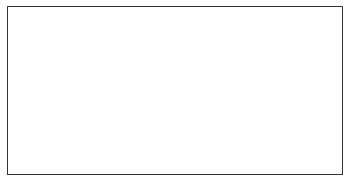

ok, that didn't do very much that was interesting, but it did create a figure. And if you look the text that got spit out we see that the axes of figure is one of those GeoAxes[Subplot] instances - this is telling us that rather than a regular matplotlib figure, this is a map that knows something about the projection. 

#### Now this figure axes (`ax`) is a Cartopy thing (object). 
And because of that `ax` has all the features of the Cartopy library. Now we can start doing some things to make the map look like a real map. 

A simple cartopy feature is called `coastlines` which, you guessed it, adds coastlines to whatever map axes we made:



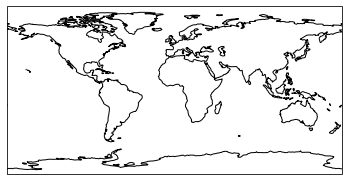

Projection classes have options we can use to customize the map. We can read about them by googling the cartopy docs, or by running the projection with a `?` or SHIFT+TAB

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           ~/anaconda3/envs/swbc2021/lib/python3.8/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:     


Looks like we can change the central longitude of the map. and add coastlines:
```python

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(____=180))
ax.____()
```



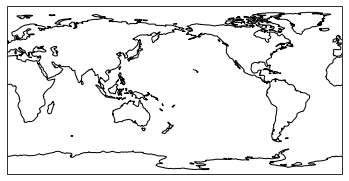

# Useful methods of a GeoAxes
The cartopy.mpl.geoaxes.GeoAxes class adds a number of useful methods.

Let's take a look at:

- `set_global` - zoom the map out as much as possible
- `set_extent` - zoom the map to the given bounding box
- `gridlines` - add a graticule (and optionally labels) to the axes
- `coastlines` - add Natural Earth coastlines to the axes
- `stock_img` - add a low-resolution Natural Earth background image to the axes
- `imshow` - add an image (numpy array) to the axes
- `add_geometries` - add a collection of geometries (Shapely) to the axes

Let's try using `ax.gridlines()` here:

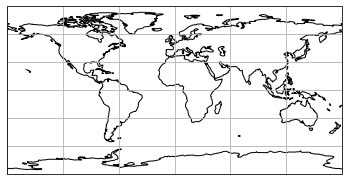

What about `ax.stock_img()`?

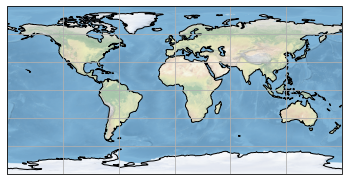

# More examples of Cartopy projections


let's loop through a few projections and look at different maps. We will make a list of projections, then fill in the blanks below to loop through it and create figures:

```python
for proj in ____:
    plt.figure()
    ax = plt.axes(projection=___)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'projection={type(proj)}')

```

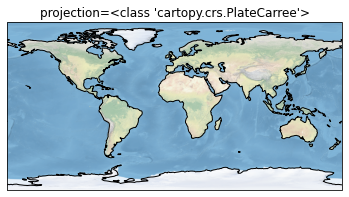

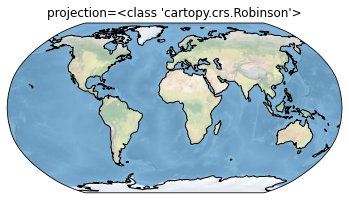

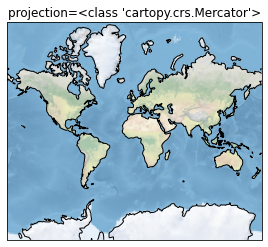

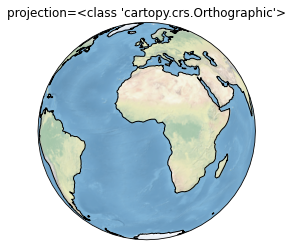

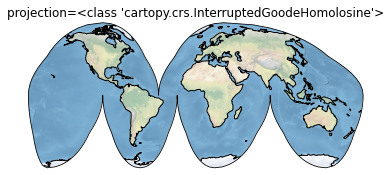

In [31]:
projections5 = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]

    